In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [11]:
parcellations_df = pd.read_csv("Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv")
# add column for brain hemisphere. If LH is in ROI Name, then it is LH, otherwise it is RH
parcellations_df['Hemisphere'] = np.where(parcellations_df['ROI Name'].str.contains("LH"), "LH", "RH")
# network mapping
mapping = {
    "Vis" : "VIS",
    "SomMot" : "MOT",
    "DorsAttn" : "DAN",
    "SalVentAttn" : "VAN",
    "Limbic" : "LBN",
    "Cont" : "FPN",
    "Default" : "DMN"
}
mapping_order = {}
for i, k in enumerate(mapping.keys()):
    mapping_order[mapping[k]] = i
parcellations_df['Network'] = ""
for network in mapping.keys():
    parcellations_df['Network'] = np.where(parcellations_df['ROI Name'].str.contains(network), mapping[network], parcellations_df['Network'])

parcellations_df.sort_values(by=['Network', "Hemisphere"], key=lambda x: x.map(mapping_order), inplace=True)
parcellations_df.reset_index(inplace=True)
parcellations_df

,index,ROI Label,ROI Name,R,A,S,Hemisphere,Network
0,0,1,7Networks_LH_Vis_1,-32,-42,-20,LH,VIS
1,1,2,7Networks_LH_Vis_2,-30,-32,-18,LH,VIS
2,2,3,7Networks_LH_Vis_3,-36,-62,-16,LH,VIS
3,3,4,7Networks_LH_Vis_4,-24,-54,-8,LH,VIS
4,4,5,7Networks_LH_Vis_5,-24,-72,-10,LH,VIS
...,...,...,...,...,...,...,...,...
395,395,396,7Networks_RH_Default_pCunPCC_5,4,-64,32,RH,DMN
396,396,397,7Networks_RH_Default_pCunPCC_6,6,-38,34,RH,DMN
397,397,398,7Networks_RH_Default_pCunPCC_7,4,-20,36,RH,DMN
398,398,399,7Networks_RH_Default_pCunPCC_8,10,-52,36,RH,DMN


In [12]:
# load Schaefer400Yeo7.mat
import scipy
indices_mat = scipy.io.loadmat("Schaefer400Yeo7.mat")
indices_array_LH = indices_mat["Schaefer400Yeo7"][0][0][0][0][:200]
indices_array_RH = indices_mat["Schaefer400Yeo7"][0][0][0][0][200:]
# for each unique value, get the first and last index of that value
indices_LH = []
indices_RH = []
for i in np.unique(indices_array_LH):
    indices_LH.append([np.where(indices_array_LH == i)[0][0], np.where(indices_array_LH == i)[0][-1]])
for i in np.unique(indices_array_RH):
    indices_RH.append([np.where(indices_array_RH == i)[0][0], np.where(indices_array_RH == i)[0][-1]])
indices_LH = np.array(indices_LH)
indices_LH[1:,0] = indices_LH[1:,0] - 1
indices_RH = np.array(indices_RH)
indices_RH = np.array(indices_RH) + 200
indices_RH[1:,0] = indices_RH[1:,0] - 1
networks_ids_for_plot_LH = {}
for i, network in enumerate(indices_LH):
    networks_ids_for_plot_LH[list(mapping.values())[i]+"_LH"] = network
networks_ids_for_plot_RH = {}
for i, network in enumerate(indices_RH):
    networks_ids_for_plot_RH[list(mapping.values())[i]+"_RH"] = network
networks_ids_for_plot = {**networks_ids_for_plot_LH, **networks_ids_for_plot_RH}
print(networks_ids_for_plot)

{'VIS_LH': array([ 0, 30], dtype=int64), 'MOT_LH': array([30, 67], dtype=int64), 'DAN_LH': array([67, 90], dtype=int64), 'VAN_LH': array([ 90, 112], dtype=int64), 'LBN_LH': array([112, 125], dtype=int64), 'FPN_LH': array([125, 147], dtype=int64), 'DMN_LH': array([147, 199], dtype=int64), 'VIS_RH': array([200, 229], dtype=int64), 'MOT_RH': array([229, 269], dtype=int64), 'DAN_RH': array([269, 292], dtype=int64), 'VAN_RH': array([292, 317], dtype=int64), 'LBN_RH': array([317, 330], dtype=int64), 'FPN_RH': array([330, 360], dtype=int64), 'DMN_RH': array([360, 399], dtype=int64)}


In [13]:
# reorder networks_ids_for_plot such that networks are adjacent for each hemisphere
networks_ids_for_plot_reordered = {}
for i, network in enumerate(mapping.keys()):
    networks_ids_for_plot_reordered[list(mapping.values())[i]+"_LH"] = networks_ids_for_plot[list(mapping.values())[i]+"_LH"]
    networks_ids_for_plot_reordered[list(mapping.values())[i]+"_RH"] = networks_ids_for_plot[list(mapping.values())[i]+"_RH"]
networks_ids_for_plot = networks_ids_for_plot_reordered
networks_ids_for_plot

{'VIS_LH': array([ 0, 30], dtype=int64),
 'VIS_RH': array([200, 229], dtype=int64),
 'MOT_LH': array([30, 67], dtype=int64),
 'MOT_RH': array([229, 269], dtype=int64),
 'DAN_LH': array([67, 90], dtype=int64),
 'DAN_RH': array([269, 292], dtype=int64),
 'VAN_LH': array([ 90, 112], dtype=int64),
 'VAN_RH': array([292, 317], dtype=int64),
 'LBN_LH': array([112, 125], dtype=int64),
 'LBN_RH': array([317, 330], dtype=int64),
 'FPN_LH': array([125, 147], dtype=int64),
 'FPN_RH': array([330, 360], dtype=int64),
 'DMN_LH': array([147, 199], dtype=int64),
 'DMN_RH': array([360, 399], dtype=int64)}

In [14]:
def move_networks_to_adjacent_rows(matrix):
    """Moves networks to adjacent positions in the matrix for each hemisphere"""
    matrix_reordered = np.zeros(matrix.shape)
    current_index = 0
    total_crop_length = 0
    total_matrix_length = 0
    for k,v in networks_ids_for_plot.items():
        start, finish = v
        crop = matrix[start:finish,:]
        # print(f"Moving {start}:{finish} to {current_index}:{current_index+crop.shape[0]}")
        # print(f"Length of crop: {crop.shape[0]}")
        total_crop_length += crop.shape[0]
        matrix_reordered[current_index:current_index+crop.shape[0],:] = crop
        # print(f"Length of matrix_reordered: {matrix_reordered[current_index:current_index+crop.shape[0],:].shape[0]}")
        total_matrix_length += matrix_reordered[current_index:current_index+crop.shape[0],:].shape[0]
        current_index += crop.shape[0]
        # print(f"Total crop length: {total_crop_length}")
        # print(f"Total matrix_reordered length: {total_matrix_length}")
    return matrix_reordered

def move_networks_to_adjacent_columns(matrix):
    """Moves networks to adjacent positions in the matrix for each hemisphere"""
    matrix_reordered = np.zeros(matrix.shape)
    current_index = 0
    total_crop_length = 0
    total_matrix_length = 0
    for k,v in networks_ids_for_plot.items():
        start, finish = v
        crop = matrix[:,start:finish]
        # print(f"Moving {start}:{finish} to {current_index}:{current_index+crop.shape[1]}")
        # print(f"Length of crop: {crop.shape[0]}")
        total_crop_length += crop.shape[1]
        matrix_reordered[:,current_index:current_index+crop.shape[1]] = crop
        # print(f"Length of matrix_reordered: {matrix_reordered[current_index:current_index+crop.shape[0],:].shape[0]}")
        total_matrix_length += matrix_reordered[:,current_index:current_index+crop.shape[1]].shape[1]
        current_index += crop.shape[1]
        # print(f"Total crop length: {total_crop_length}")
        # print(f"Total matrix_reordered length: {total_matrix_length}")
    return matrix_reordered

def move_networks_to_adjacent(matrix):
    matrix = move_networks_to_adjacent_rows(matrix)
    return move_networks_to_adjacent_columns(matrix)

In [15]:
# test is filled with ints that increase from left to right, top to bottom
# test = np.zeros((400, 400))
# for i in range(400):
#     for j in range(400):
#         test[i, j] = i*400 + j*400
# test_reordered = move_networks_to_adjacent(test)
# sns.heatmap(test)
# plt.show()
# sns.heatmap(test_reordered)
# plt.show()

In [16]:
networks_ids_for_plot_remapped = {}
for network, indices in networks_ids_for_plot.items():
    if network == "VIS_LH":
        previous = indices
        networks_ids_for_plot_remapped[network] = indices
        continue
    start, finish = indices
    diff = finish - start
    i = previous[1]
    networks_ids_for_plot_remapped[network] = [i, i+finish-start]
    previous = [i, i+finish-start]
networks_ids_for_plot = networks_ids_for_plot_remapped
networks_ids_for_plot_remapped

{'VIS_LH': array([ 0, 30], dtype=int64),
 'VIS_RH': [30, 59],
 'MOT_LH': [59, 96],
 'MOT_RH': [96, 136],
 'DAN_LH': [136, 159],
 'DAN_RH': [159, 182],
 'VAN_LH': [182, 204],
 'VAN_RH': [204, 229],
 'LBN_LH': [229, 242],
 'LBN_RH': [242, 255],
 'FPN_LH': [255, 277],
 'FPN_RH': [277, 307],
 'DMN_LH': [307, 359],
 'DMN_RH': [359, 398]}

In [17]:
att_weights = np.squeeze(np.load("../code/attention_weights.npy"))
att_weights.shape
att_weights = move_networks_to_adjacent(att_weights)

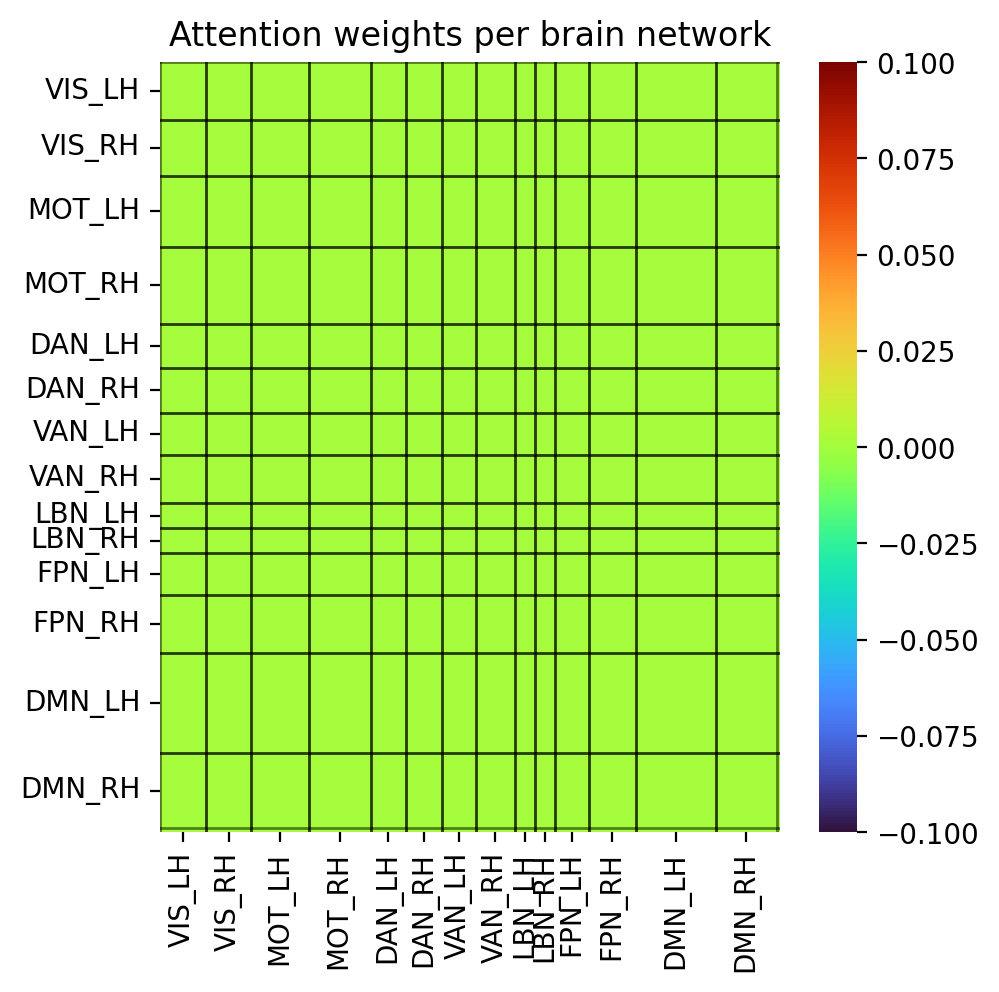

In [18]:
plt.figure(figsize=(5, 5), dpi=200)
sns.heatmap(att_weights.mean(axis=0), cmap="turbo")
# add xticks in the middle of networks indicated by network_ids_for_plot
xticks = []
for k, v in networks_ids_for_plot.items():
    xticks.append(np.mean(v))
yticks = xticks
# add network name on the xticks
xticklabels = list(networks_ids_for_plot.keys())
yticklabels = xticklabels
# add vlines to separate networks
lw = 1
alpha = 0.5
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)

plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
plt.title("Attention weights per brain network")
plt.show()

In [19]:
def network_mean(matrix, network_ids=networks_ids_for_plot):
    mean_matrix = np.zeros_like(matrix)
    for k1, v1 in network_ids.items():
        for k2, v2 in network_ids.items():
            mean_matrix[v1[0]:v1[1]+1, v2[0]:v2[1]+1] = matrix[v1[0]:v1[1]+1, v2[0]:v2[1]+1].flatten().mean()
    return mean_matrix

Text(0.5, 1.0, 'Attention weights per brain network')

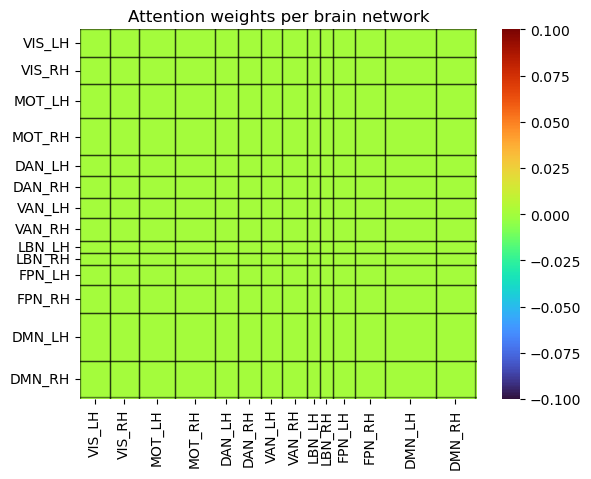

In [20]:
att_weights_mean = network_mean(att_weights.mean(axis=0))
        
sns.heatmap(att_weights_mean, cmap="turbo")
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)

plt.title("Attention weights per brain network")

In [21]:
attributions = np.load("../code/attributions.npy")
    
attributions_cmap = "icefire"
# attributions_cmap = "vlag"

In [22]:
attributions.shape

(9, 32, 400, 400)

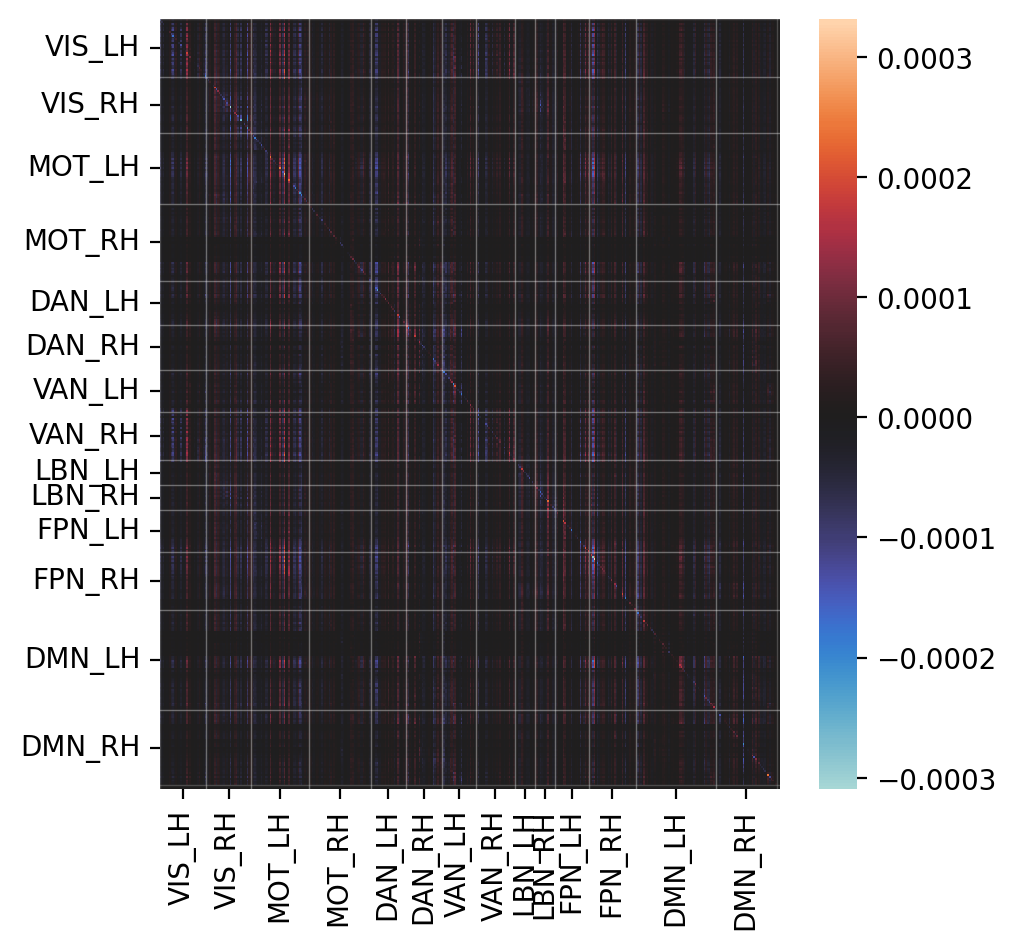

In [23]:
lw = 0.5
alpha = 0.2
plot = attributions[0]
plt.figure(figsize=(5, 5), dpi=200)
sns.heatmap(move_networks_to_adjacent(plot.mean(axis=0)), cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="white", linewidth=lw, alpha=alpha)


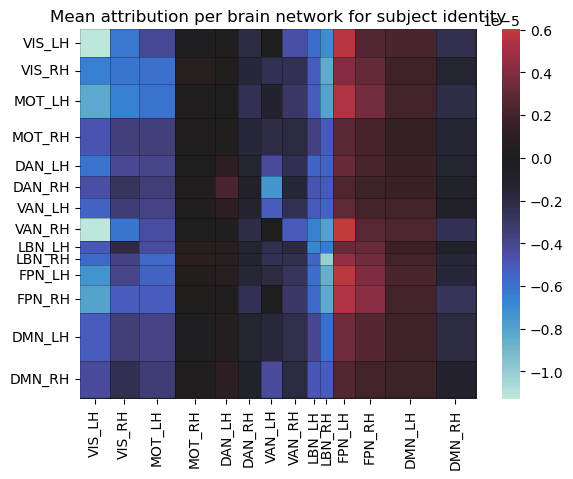

In [24]:
plot = move_networks_to_adjacent(attributions[0].mean(axis=0) )
plot = network_mean(plot)

sns.heatmap(plot, cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
plt.title("Mean attribution per brain network for subject identity")
plt.show()


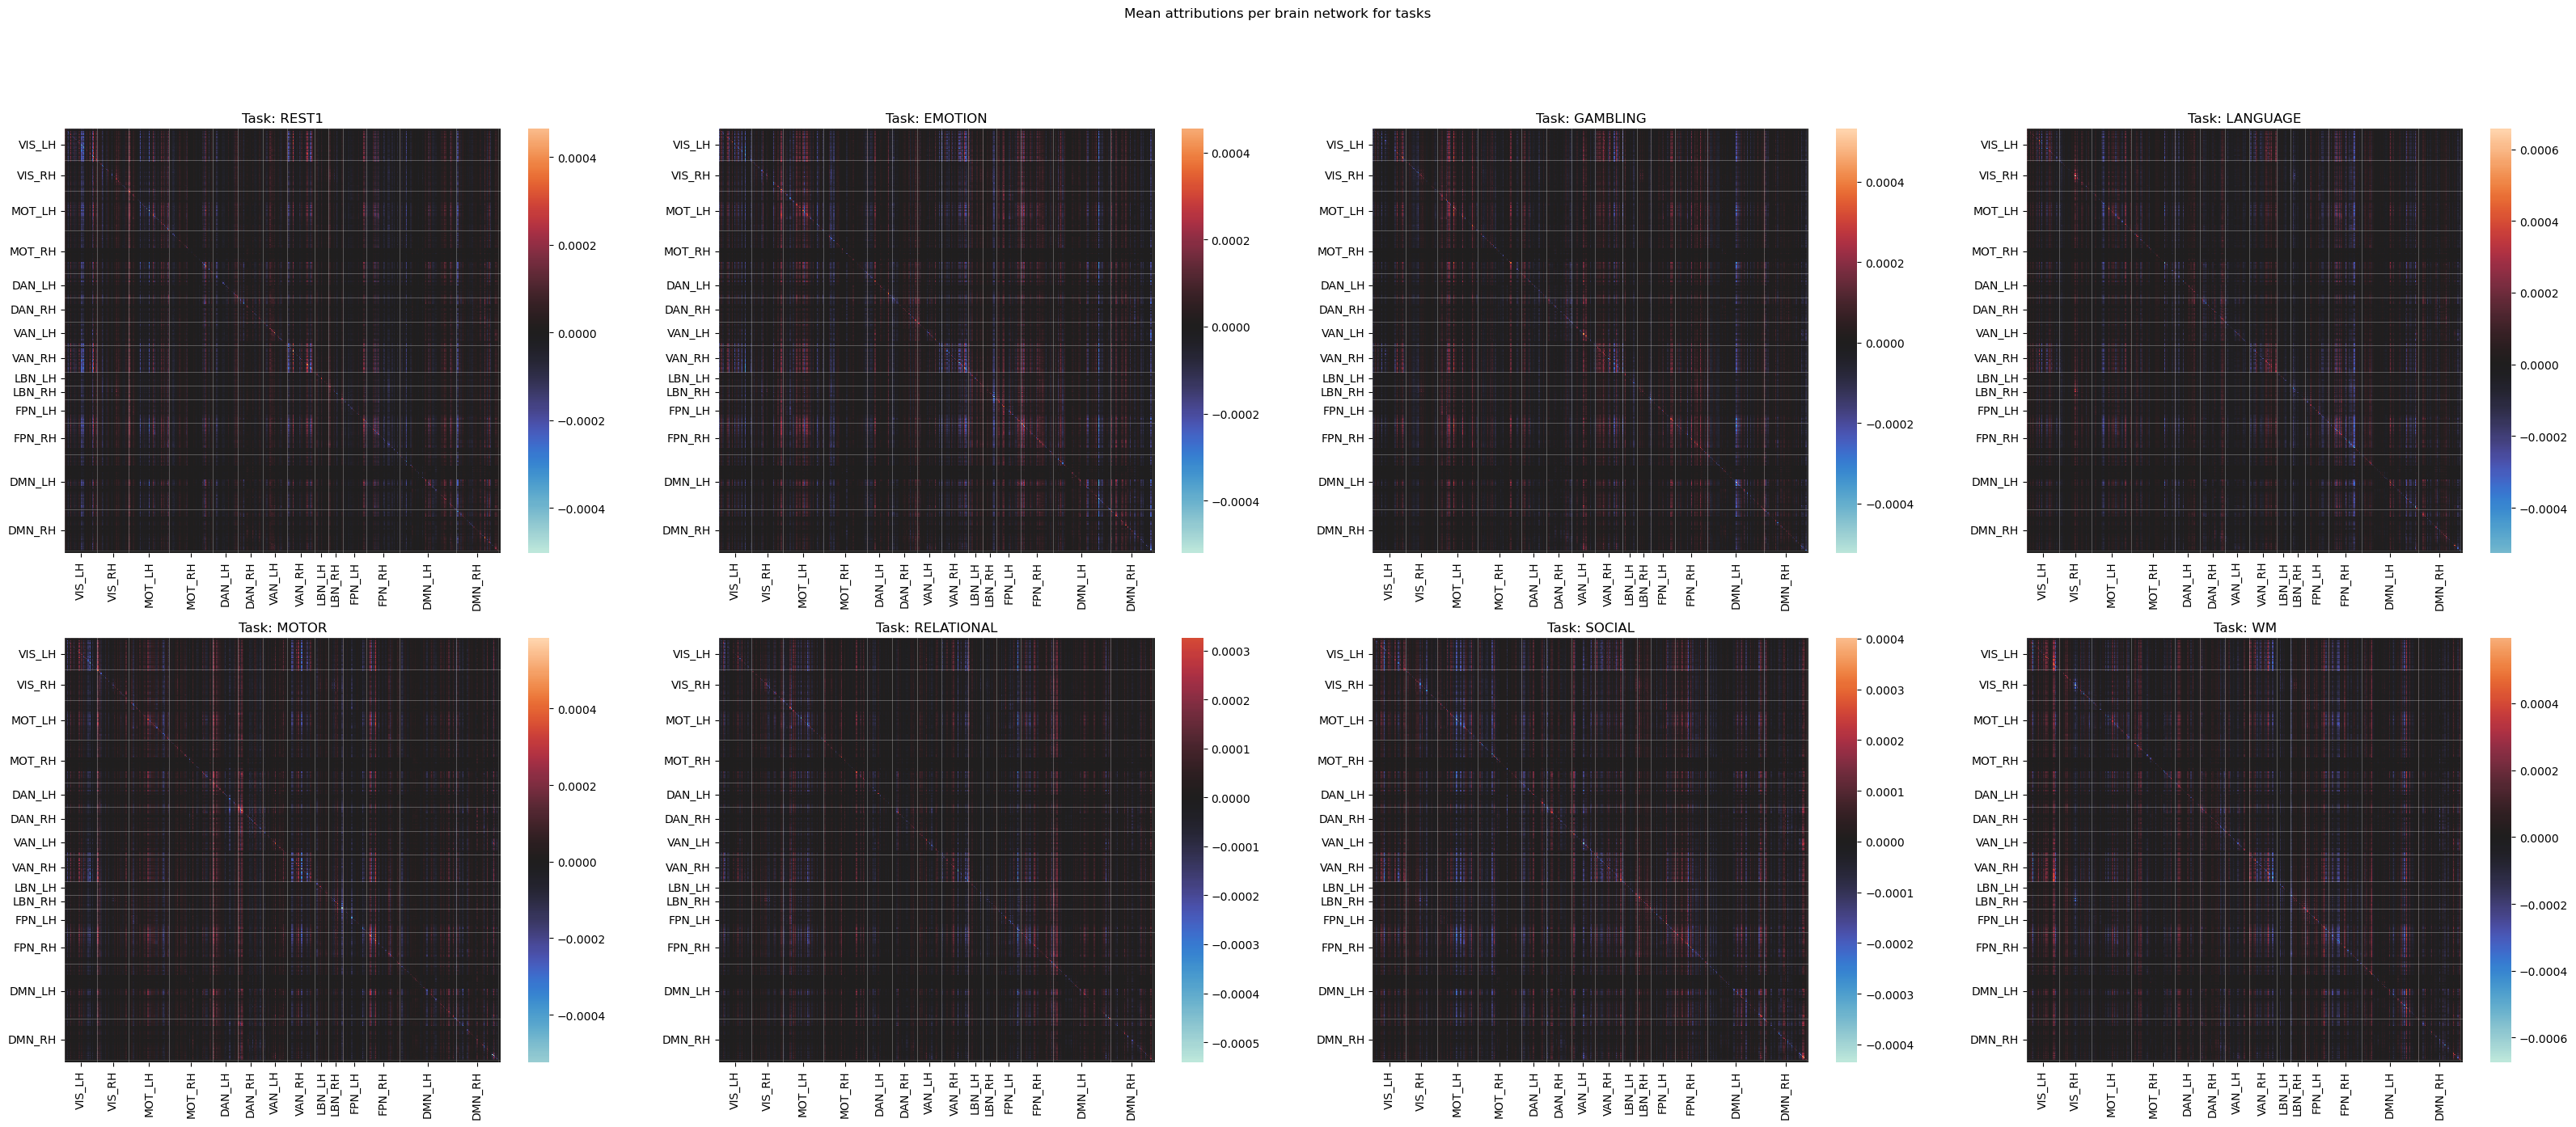

In [25]:
task_labels = [
            "REST1",
            "EMOTION",
            "GAMBLING",
            "LANGUAGE",
            "MOTOR",
            "RELATIONAL",
            "SOCIAL",
            "WM",
        ]
vmin = attributions[:1].mean(axis=1).min()
vmax = attributions[:1].mean(axis=1).max()
fig, axs = plt.subplots(2, 4, figsize=(40, 15), dpi=100)
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    sns.heatmap(move_networks_to_adjacent(attributions[i+1].mean(axis=0)), cmap=attributions_cmap, center=0,ax=ax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="white", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks")
plt.show()

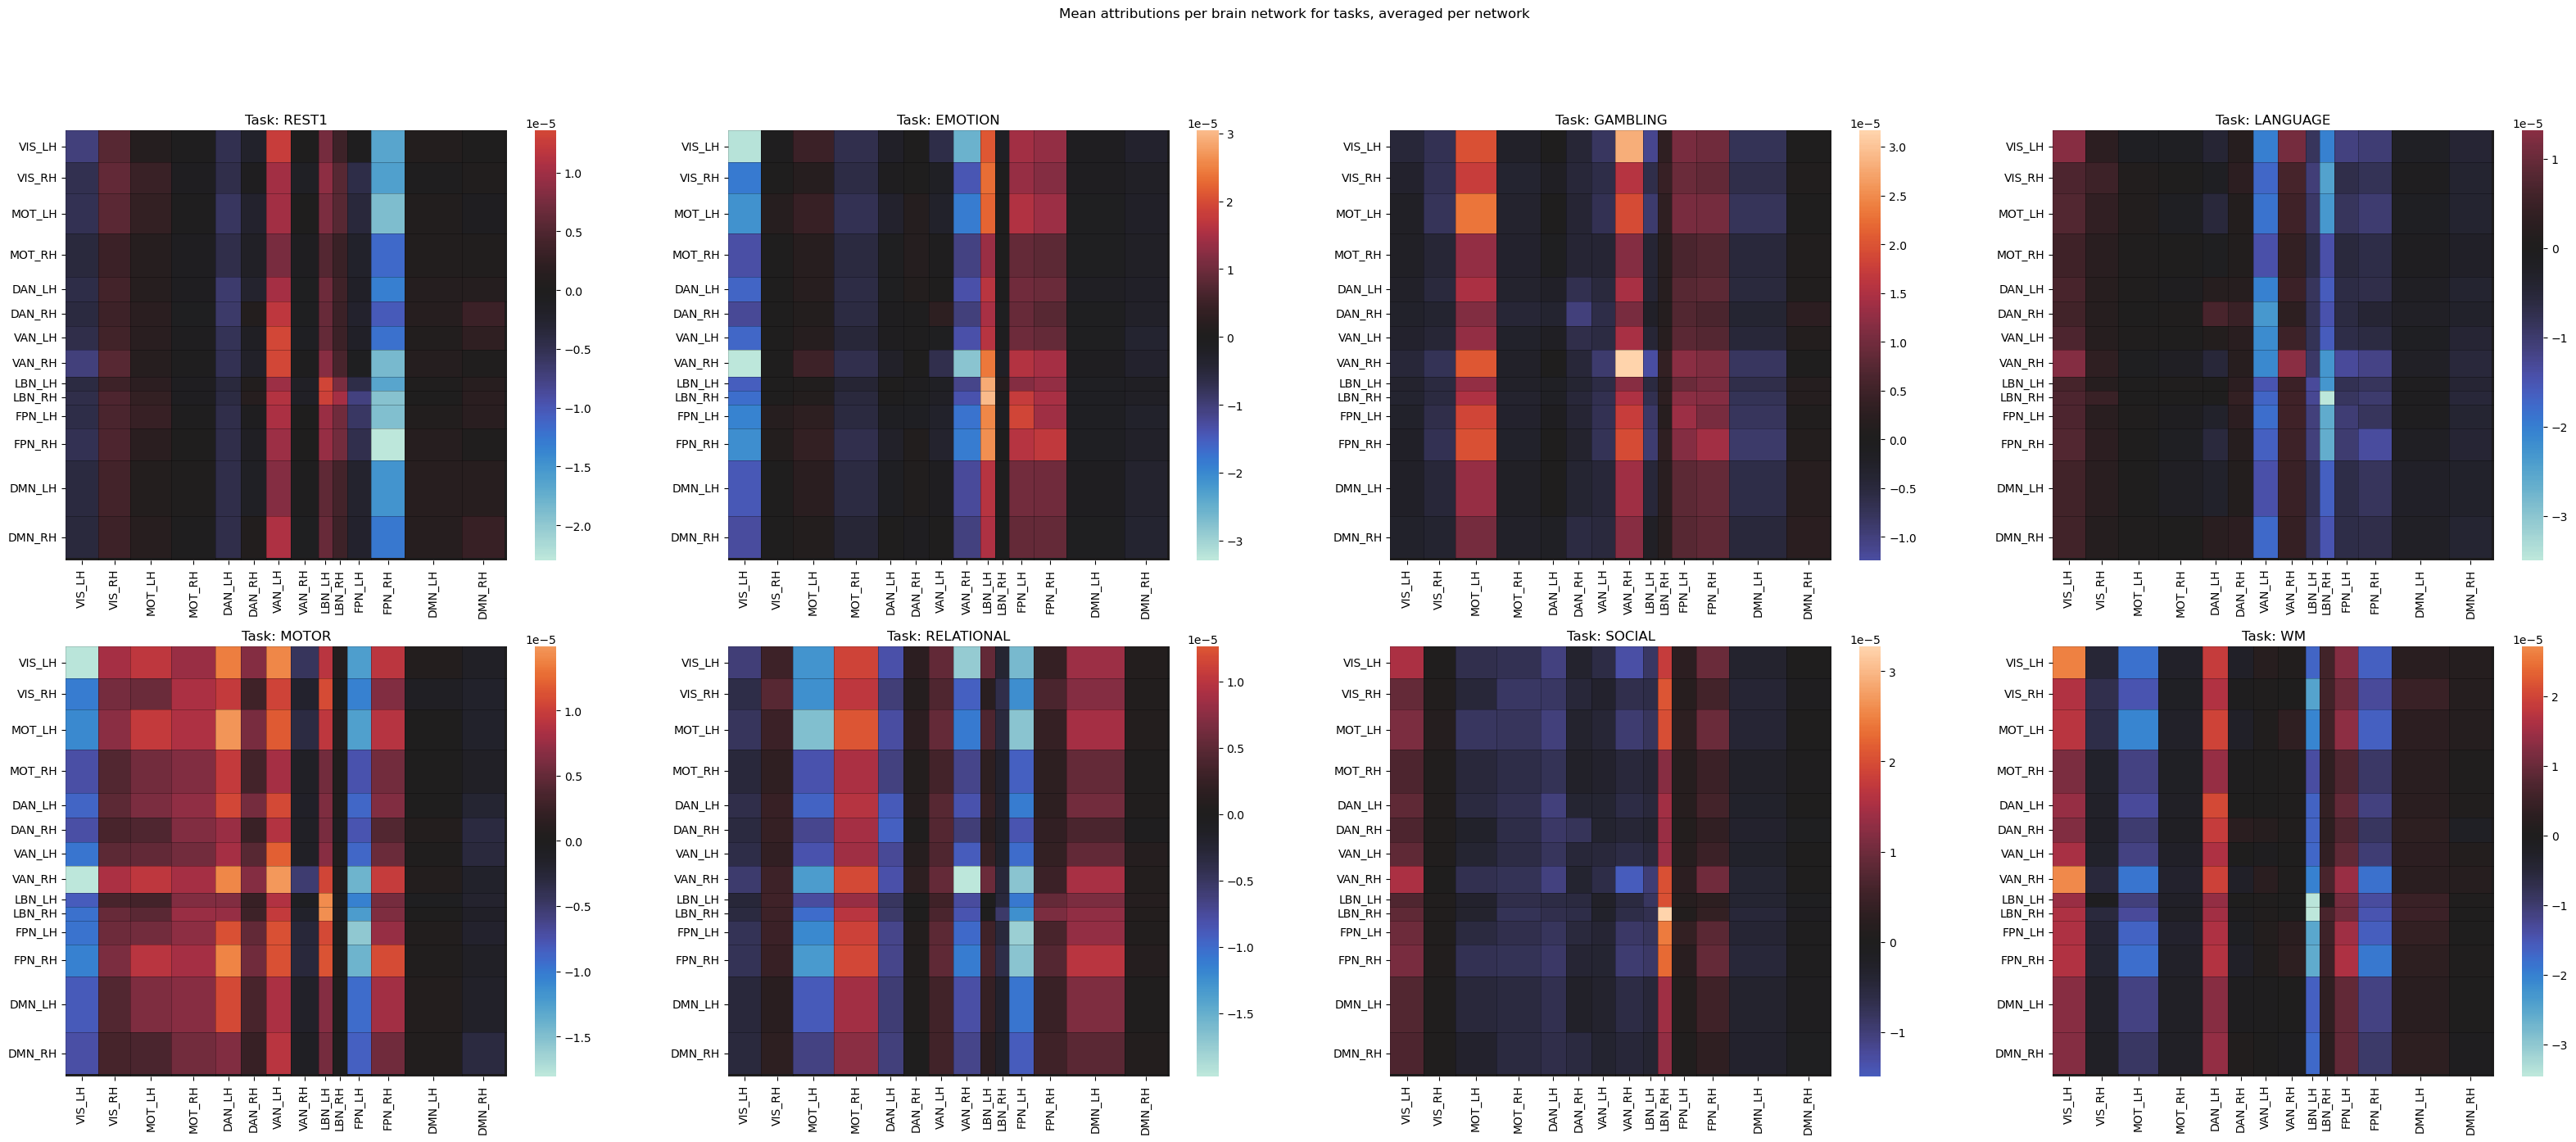

In [26]:
task_labels = [
            "REST1",
            "EMOTION",
            "GAMBLING",
            "LANGUAGE",
            "MOTOR",
            "RELATIONAL",
            "SOCIAL",
            "WM",
        ]
vmin = attributions[1:].mean(axis=1).min()
vmax = attributions[1:].mean(axis=1).max()
fig, axs = plt.subplots(2, 4, figsize=(25, 10))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    window_mean = network_mean(attributions[i+1].mean(axis=0))
    sns.heatmap(move_networks_to_adjacent(window_mean), cmap=attributions_cmap, center=0,ax=ax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks, averaged per network")
plt.show()

In [27]:
# subtract SI attributions from task attributions
# task_attributions = attributions[1:]
# subtraction = task_attributions - attributions[0]
# # plot subtractions
# fig, axs = plt.subplots(2, 4, figsize=(25, 10))
# for i, task in enumerate(task_labels):
#     ax = axs.flatten()[i]
#     window_mean = network_mean(subtraction[i].mean(axis=0))
#     sns.heatmap(window_mean, cmap=attributions_cmap, center=0,ax=ax)
#     ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=0)
#     ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
#     for v in networks_ids_for_plot.values():
#         ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
#         ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
#         ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
#         ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
#     ax.set_title(f"Task: {task}")

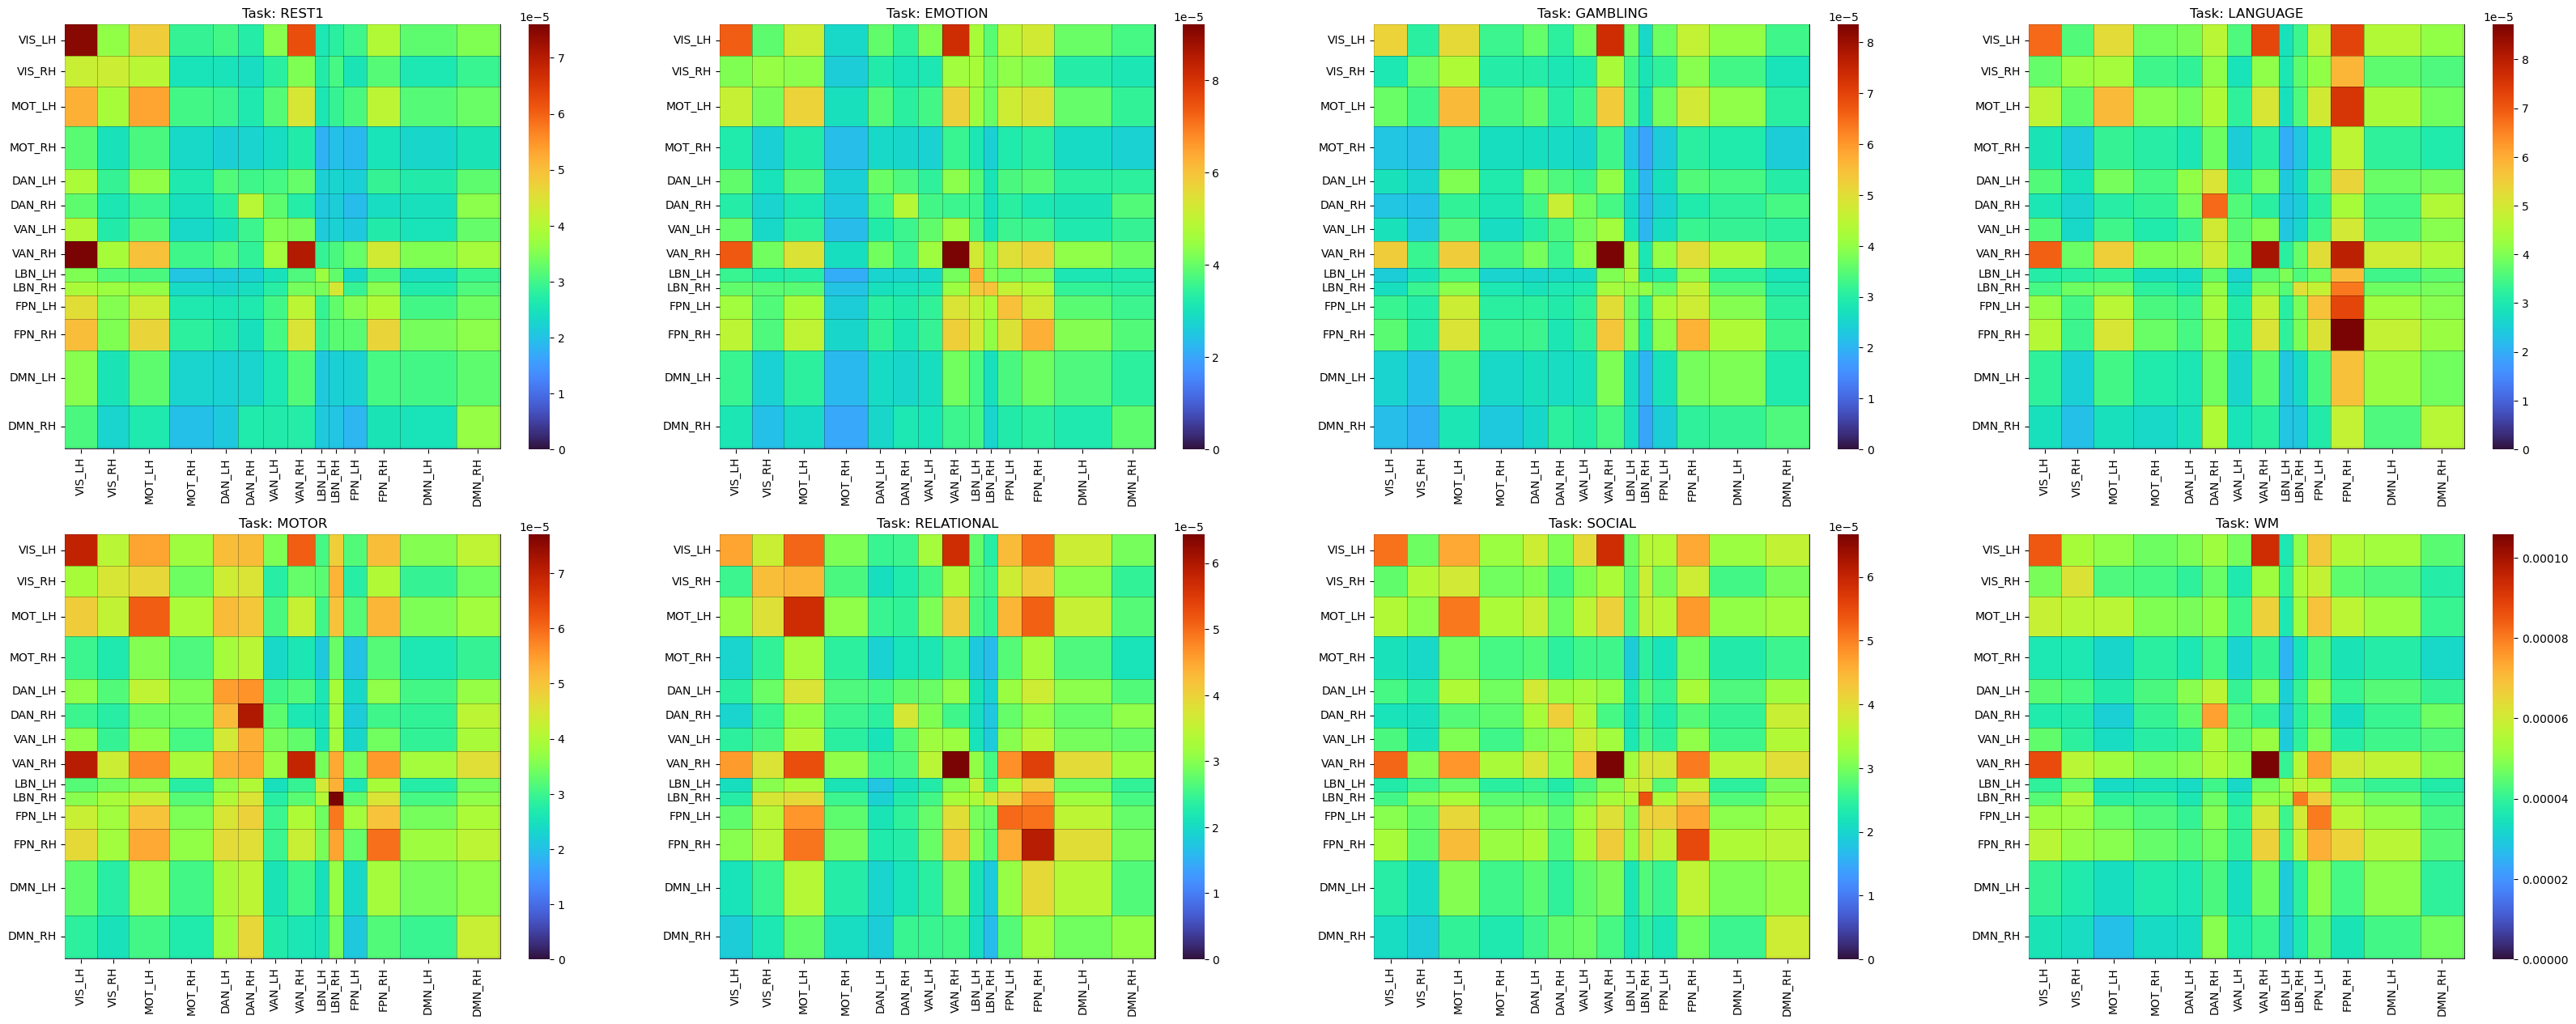

In [28]:
vmin = 0
vmax =np.abs(attributions[1:]).mean(axis=1).max()

fig, axs = plt.subplots(2, 4, figsize=(25, 10))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    plot = move_networks_to_adjacent(np.abs(attributions[i+1]).mean(axis=0))
    
    window_mean = (network_mean(plot))
    sns.heatmap(window_mean, cmap=attributions_cmap,ax=ax, vmin=vmin, vmax=vmax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")

In [29]:
# reorder to have LR fixed OK
# take row abs+mean and project back to 400 brain regions
# plot of acc per intermediate layer num of neurons -> show with/without dropout for dim 100